# Gaussian exercise

1. Generate N random values from a gaussian distribution.
2. Compute the Likelihood

$ L = -ln(\mu_{max} - \mu_{min}) - ln(ln(\frac{\sigma_{max}}{\sigma_{min}})) + N\left(\frac{1}{2} ln(2\pi) +ln(\sigma) \right) - \frac{N}{2\sigma^{2}}\left[\left( \overline{x} - \mu \right)^{2} + V\right]$\
\
$V = \frac{N-1}{N}s^{2}$
\
\
$s = \braket{x^2} - \braket{x}^{2} $

In [467]:
import numpy as np
import matplotlib.pyplot as plt

In [468]:
true_mu = 7
true_sigma = 1
N = int(1e4)
x = np.random.normal(true_mu, true_sigma, N)

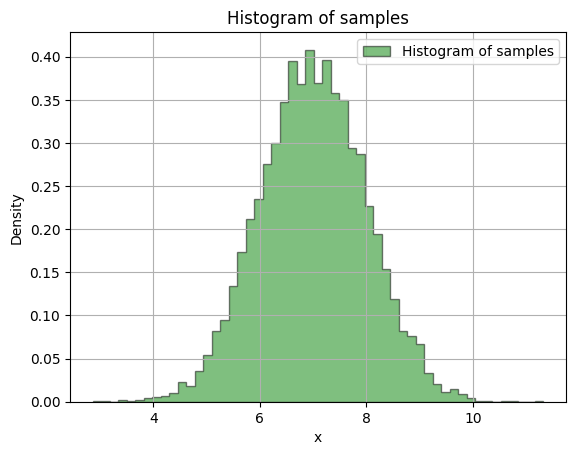

In [469]:
plt.hist(x, bins='scott', density=True, alpha=0.5, color='g', label='Histogram of samples', edgecolor='black', linewidth=1, histtype='stepfilled')
plt.title('Histogram of samples')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.grid()

In [470]:
# Bounds for priors
mu_max = 10
mu_min = 4

sigma_max = 3
sigma_min = 0.5

In [471]:
# Create a meshgrid for the prior

sigmas = np.linspace(sigma_min,sigma_max, 100)
mus = np.linspace(mu_min, mu_max, 100)

In [472]:
MU, SIGMA = np.meshgrid(mus, sigmas)

In [473]:
P = - (N+1) * np.log(SIGMA) - N/(2*SIGMA**2) * ((x.mean() - MU)**2 - (N+1)/N * x.std()**2)
P/=P.max()

<>:18: SyntaxWarning: invalid escape sequence '\m'
<>:18: SyntaxWarning: invalid escape sequence '\m'
C:\Users\ricca\AppData\Local\Temp\ipykernel_18896\4025304453.py:18: SyntaxWarning: invalid escape sequence '\m'
  '''


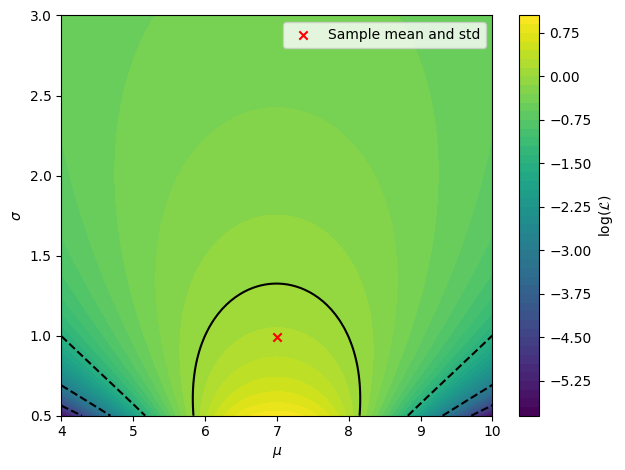

In [474]:
fig, ax = plt.subplots()

# Filled contour with a better colormap
contour = ax.contourf(MU, SIGMA, P, levels=50, cmap='viridis')

# Add contour lines
cs = ax.contour(MU, SIGMA, P, levels=5, colors='black')

# Add color bar
cbar = plt.colorbar(contour)
cbar.set_label(r'$\log(\mathcal{L})$')

# Axis labels
ax.set_xlabel(r'$\mu$')
ax.set_ylabel(r'$\sigma$')

ax.scatter(x.mean(), x.std(), color='red', label='Sample mean and std', marker='x', zorder=5)
'''
# Title in a box
ax.text(1.0, 5.2, r'$\mathcal{L}(\mu, \sigma)\ \mathrm{for}\ \bar{x}=1,\ V=4,\ n=10$',
        bbox=dict(facecolor='white', edgecolor='black'), ha='center')
'''
plt.tight_layout()
plt.legend()

Compute $p(\mu|\{x_i\}, I)$ integrating over $\sigma$

In [475]:
posterior_mu = P.sum(axis=1) * (sigma_max - sigma_min) / mus.shape[0]
posterior_sigma = P.sum(axis=0) * (mu_max - mu_min) / sigmas.shape[0]

<>:1: SyntaxWarning: invalid escape sequence '\m'
<>:1: SyntaxWarning: invalid escape sequence '\m'
C:\Users\ricca\AppData\Local\Temp\ipykernel_18896\173344739.py:1: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(mus, posterior_mu, color='red', marker='.',linewidth=2, label='Posterior distribution of $\mu$')


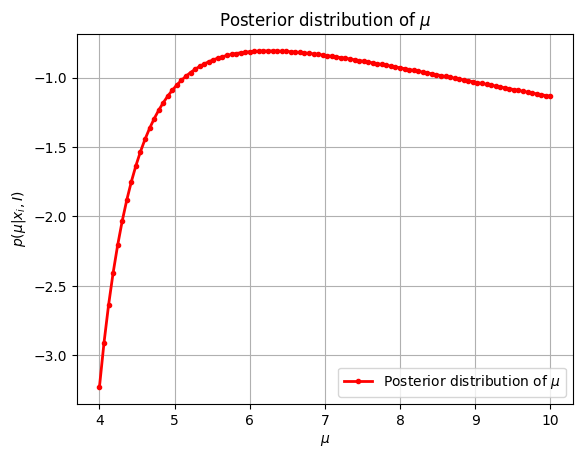

In [476]:
plt.plot(mus, posterior_mu, color='red', marker='.',linewidth=2, label='Posterior distribution of $\mu$')
plt.xlabel(r'$\mu$')
plt.ylabel(r'$p(\mu | {x_i}, I)$')
plt.title(r'Posterior distribution of $\mu$')
plt.legend()
plt.grid()

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\ricca\AppData\Local\Temp\ipykernel_18896\2765934530.py:1: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(sigmas, posterior_sigma, color='red', marker='.',linewidth=2, label='Posterior distribution of $\sigma$')


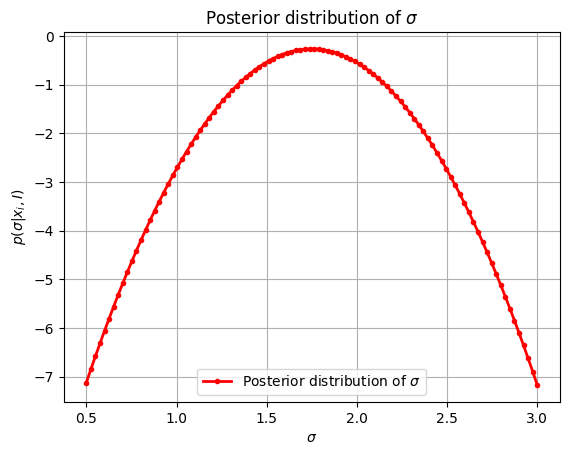

In [477]:
plt.plot(sigmas, posterior_sigma, color='red', marker='.',linewidth=2, label='Posterior distribution of $\sigma$')
plt.xlabel(r'$\sigma$')
plt.ylabel(r'$p(\sigma | {x_i}, I)$')
plt.title(r'Posterior distribution of $\sigma$')
plt.legend()
plt.grid()

Let's do this for a Cauchy distribution